# Atmospheric Transmission

An important consideration for remote sensing is the proportion of total electromagnetic radiation that can make it through Earth's atmosphere. Only the wavelengths of the electromagnetic spectrum which are largely transmissible through the atmosphere can be used for remote sensing observations.

To quantify transmission, we'll first define the cumulative extinction of electromagnetic radiation as it passes through the atmosphere, defined as 

$$
L(z) = L_0\text{exp}\left[-\int_0^{z_H} \kappa_E(z) \, dz \right]
$$

$L$ is the irradiance and $\kappa_E$, in units of m$^{-1}$, is the extinction coeffcient for a given gas that accounts for both absorption and scattering. When integrated over the entire atmopshere, the term in the exponential, i.e.

$$
\tau = \int_0^{z_H} \kappa_E(z) \, dz
$$

is defined as the *optical depth* in the atmosphere. Note that $L$ is a function of wavelength. 

The **transmittance** is defined in terms of the optical depth as

$$
t = e^{-\tau}
$$

Note that since optical depth has values in the range $[0, \infty)$, transmittance has values in the range $[0, 1]$, or between 0% and 100%.

First, this page will summarize the total atmopsheric transmission. Then, we will break down the total transmission by each gas.

Since we'll be making several plots, begin by import modules to read, process, and plot data:

In [1]:
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt

Next, read in a dataset generated using [Py6S](Py6S), the Python-wrapped version of [6S](6S) model used to quantify reflection, absorption, and transmission of electromagnetic radiation for wavelengths in the UV, visible, and shortwave infrared regions of the spectrum:

In [2]:
# plot the atmospheric transmission data
ds = nc4.Dataset('../data/molecular_transmission.nc')
h2o = ds.variables['water_vapor'][:]
co2 = ds.variables['carbon_dioxide'][:]
o2 = ds.variables['oxygen'][:]
o3 = ds.variables['ozone'][:]
n2o = ds.variables['nitrous_oxide'][:]
ch4 = ds.variables['methane'][:]
rayleigh = ds.variables['rayleigh_scattering'][:]
gas = ds.variables['global_gas'][:]
ds.close()
wavelengths = np.arange(0.2,4.00,0.01)

Finally, with a look to the many plots we will explore on this page, define a generic plotting function that can be used many times over:

In [3]:
def plot_transmission_figure(wavelengths, transmission, title):
    fig = plt.figure(figsize=(8,4))
    plt.plot(np.log10(wavelengths),  transmission*100)
    xticks = np.log10(np.array([0.2, 0.38, 0.55, 0.7, 1, 2, 3, 4]))
    plt.gca().set_xticks(xticks)
    xtickslabels = ['200', '380', '550', '700', '1000', '2000', '3000', '4000']
    plt.gca().set_xticklabels(xtickslabels)
    plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
    plt.ylabel('Atmospheric Transmission (%)')
    plt.xlabel('Wavelength (nm)')
    plt.title(title)
    plt.ylim([-5,105])
    plt.show()

## Total Atmospheric Tranmission

Using the plotting function above, the total transmission by gases in the atmosphere can be visualized as follows:

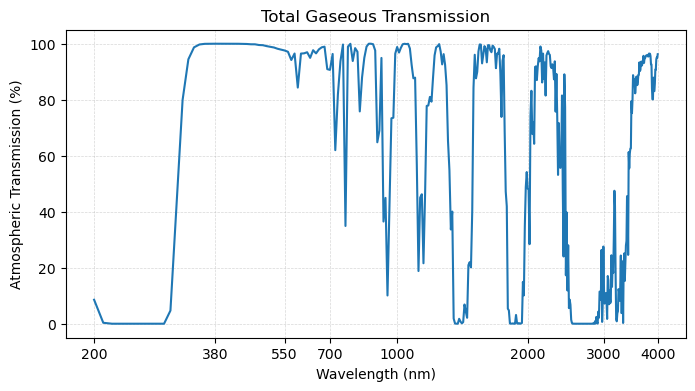

In [4]:
plot_transmission_figure(wavelengths, gas,
                         title = 'Total Gaseous Transmission')

As we can see, there are various parts of the electromagnetic spectrum in which no light makes it through the atmosphere. For example, there is a large region near in the UV portion of the spectrum between 200-300 in which there is very little transmission. Similarly, there are other portions of the spectrum where there are **atmospheric windows** - portions of the spectrum in which nearly all light is transmissible through the atmopshere. 

In addition to molecular absorption, gases also scatter light in the atmosphere. The predominant form of scatter in the atmosphere is *Rayleigh scattering* which can be visualized as:

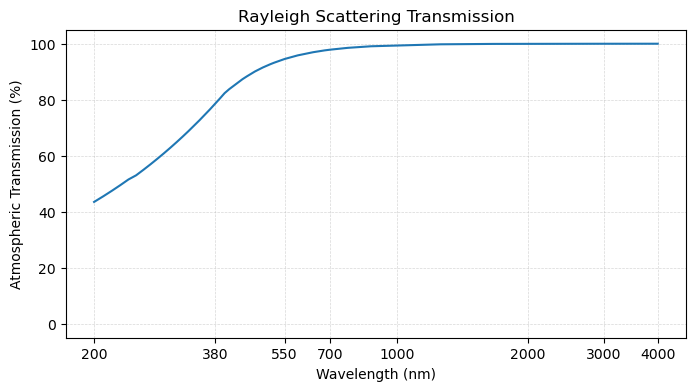

In [5]:
plot_transmission_figure(wavelengths, rayleigh,
                         title = 'Rayleigh Scattering Transmission')

In this curve, we see that light at shorter wavelengths is scattered more strongly than those at longer wavelengths.

To determine the total amount of radiation passing downward through the atmosphere, we can multiply the atmospheric transmission by the total radiation from the sun. Approximating the sun as a blackbody, [Planck's Law](https://profmikewood.github.io/ocean_remote_sensing_book/intro.html) allows us to estimate the total radiation:

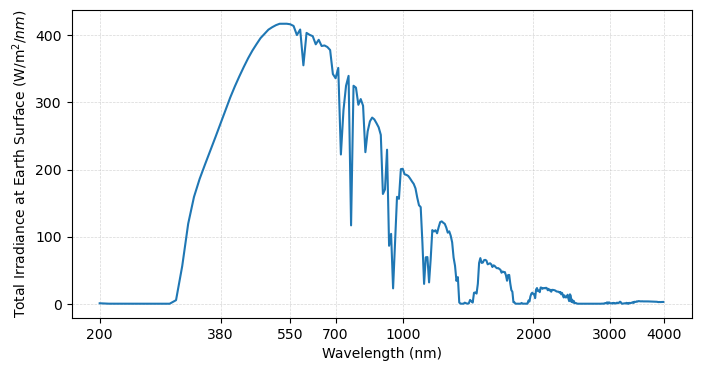

In [6]:
# Planck's Law
T = 5525
kB = 1.380649e-23
h = 6.626e-34
c = 299792458
Fp = (2*h*c**2/(wavelengths/1e6)**5) * (1/(np.exp(h*c/((wavelengths/1e6)*kB*T))-1))

# modify to account fot earth-sun difference
r_S = 6.96e8 # radius of sun
d_ES = 1.5e14 # distance from Earth to Sun
Fp_Earth = Fp*(r_S**2)/(d_ES**2)

# make a figure
fig = plt.figure(figsize=(8,4))
plt.plot(np.log10(wavelengths),  Fp_Earth*gas*rayleigh)
xticks = np.log10(np.array([0.2, 0.38, 0.55, 0.7, 1, 2, 3, 4]))
plt.gca().set_xticks(xticks)
xtickslabels = ['200', '380', '550', '700', '1000', '2000', '3000', '4000']
plt.gca().set_xticklabels(xtickslabels)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.ylabel('Total Irradiance at Earth Surface (W/m$^2/nm$)')
plt.xlabel('Wavelength (nm)')
plt.show()

## Transmission by Atmospheric Constituents
As we saw above the transmittance through the atmosphere is largely dependent on which gases are present and how much electromagnatic radiation they transmit (as encapsulated in the $\kappa_E$ term). Ten of the main gases in the atmopshere are as follows:

| Gas Name | Concentration |
|----------|---------|
| Nitrogen (N$_2$) | 78% |
| Oxygen (O$_2$) | 21% |
| Argon (Ar) | 0.93% |
| Carbon Dioxide (CO$_2$) | 420 ppm (and rising) |
| Water Vapor (H$_2$O) | Variable |
| Ozone (O$_3$) | Variable |
| Nitrous Oxide (N$_2$O) | X ppm |
| Methane (CH$_4$) | X ppm |
| Carbon Monoxide (N$_2$) | X ppm |

Next, we'll examine the transmission curves for many of the common atmospheric gases.

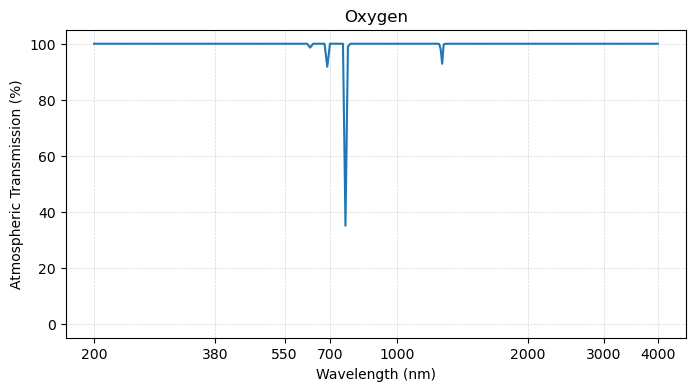

In [7]:
plot_transmission_figure(wavelengths, o2,
                         title = 'Oxygen')

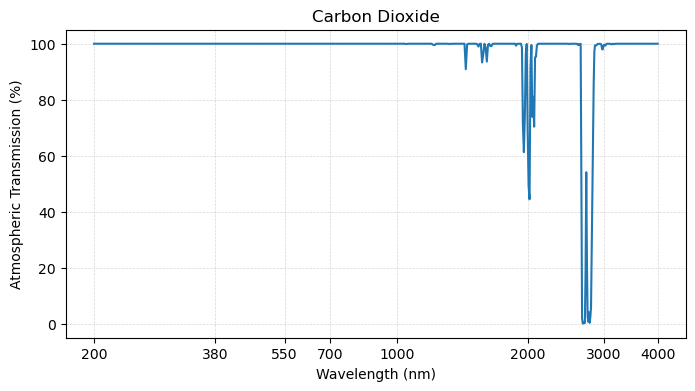

In [8]:
plot_transmission_figure(wavelengths, co2,
                         title = 'Carbon Dioxide')

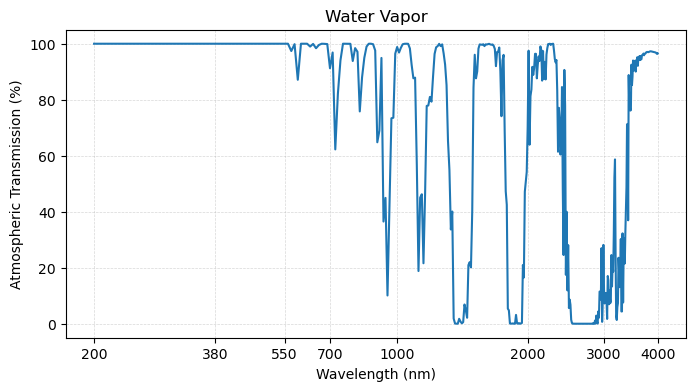

In [9]:
plot_transmission_figure(wavelengths, h2o,
                         title = 'Water Vapor')

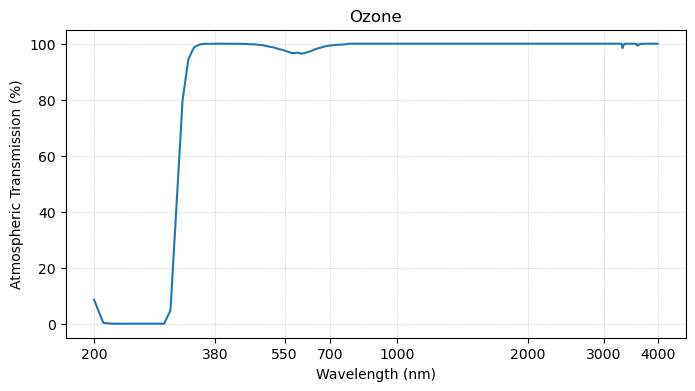

In [10]:
plot_transmission_figure(wavelengths, o3,
                         title = 'Ozone')

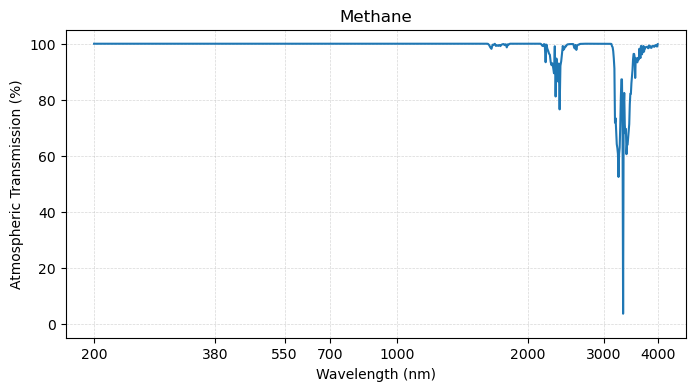

In [11]:
plot_transmission_figure(wavelengths, ch4,
                         title = 'Methane')

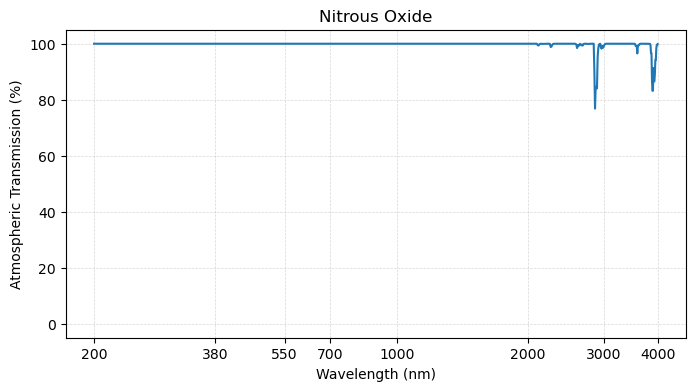

In [12]:
plot_transmission_figure(wavelengths, n2o,
                         title = 'Nitrous Oxide')

Several important observations can be made by examining the plots above.

First, it turns out that many of the atmospheric "wiggles" in the total transmission spectrum arise from water vapor - particularly in the shortware infrared region of the spectrum. Since water vapor is highly variable in the atmosphere, this has implications for radiation at the ocean surface.

Second, we observe that ozone absorbs strongly in UV part of spectrum. This gas is important for protecting life on the planet since UV radiation is harmful to cell reproduction.

Third, the main greenhouse gases shown above - carbon dioxide, methane, and nitrous oxide - are "invisible" in the visible range of the spectrum, but start to interact with radiation at the longer wavelengths.